# Multiclass xgboost performance figures

Evaluates the multiclass XGBoost model on the TCGA test set. Generates confusion matrices, ROC curves and precision-recall curves in the folder figure_folder.

In [2]:
figure_folder = 'multiclass_xgboost_figs/'

Add the Evaluate module to path and make figure folder:

In [3]:
# adding this path so we can import Evaluate
import sys
import os

cwd = os.getcwd() # get the current path, and only take up to methylation-patterns-izzy (discarding the end bit)
file = 'methylation-patterns-izzy'
end = cwd.find(file) + len(file) + 1 # find start of file in path, add on its lenth to go to the end, and add on 1 to get the /
path = cwd[0:end]
print("path is ", path)
sys.path.append(path)

from Evaluate import load_and_eval
root_path = path

if not (figure_folder.strip('/') in os.listdir()):
    os.mkdir(figure_folder)

path is  /Tank/methylation-patterns-code/methylation-patterns-izzy/


Use the load and eval function:

This is expected to take a while as the TCGA dataset is quite large. (there is room for optimisation in the load_and_eval function if you want to make it quicker)

In [3]:
load_and_eval('../xgboost/depth3est800lr189/xgboost_model_.pkl', '../xgboost/depth3est800lr189/test_data_indices_XGBoost_', 'xgboost_multiclass', cancer_code='', use_small=False, remove_inf = True, folder_name=figure_folder)

Getting values and diagnoses from: 
/Tank/methylation-patterns-code/methylation-patterns-izzy/data_preprocessing/dataset/pandas/m_values/TCGA-all.csv
/Tank/methylation-patterns-code/methylation-patterns-izzy/data_preprocessing/dataset/pandas/diagnoses/TCGA-all.csv
m_value and diagnoses shapes:
(276016, 6224)
(6224,)
num classes is:  14
Acc, conf mat:
0.9820051413881749
[[166   2   2   0   1   0   0   0   0   0   1   2   2   0]
 [  0 102   0   0   0   1   0   0   0   0   1   0   0   0]
 [  1   0 197   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0  78   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  46   0   0   0   0   0   0   0   0   0]
 [  1   0   1   0   0 130   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  81   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5  64   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 119   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0 

In [ ]:
# getting pr and roc auc bar plots:
metrics_path = 'multiclass_xgboost_figs/metrics_xgboost_multiclass.csv'
cancer_type = ''
model_path = '../xgboost/depth3est800lr189/xgboost_model_.pkl'
from Evaluate import load_data_from_indices
Xtest, ytest = load_data_from_indices('../xgboost/depth3est800lr189/test_data_indices_XGBoost_', '', True)




In [6]:
Xtest = None
ytest = None

<module 'Evaluate' from '/Tank/methylation-patterns-code/methylation-patterns-izzy/Evaluate.py'>

 Can just quote:  ['0.9826003173226566', '0.9978673069313816', '0.9988368840307889', '0.9999999999999997', '0.9986067259694235', '0.9990633087752845', '0.9957316486042915', '0.9817577930796605', '1.0000000000000002', '0.9999999999999998', '0.9972495500766817', '0.9933909759389588', '0.9984145671736389', '0.9999999999999998']


[0.9826003173226566,
 0.9978673069313816,
 0.9988368840307889,
 0.9999999999999997,
 0.9986067259694235,
 0.9990633087752845,
 0.9957316486042915,
 0.9817577930796605,
 1.0000000000000002,
 0.9999999999999998,
 0.9972495500766817,
 0.9933909759389588,
 0.9984145671736389,
 0.9999999999999998]

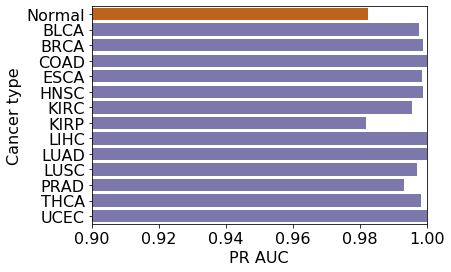

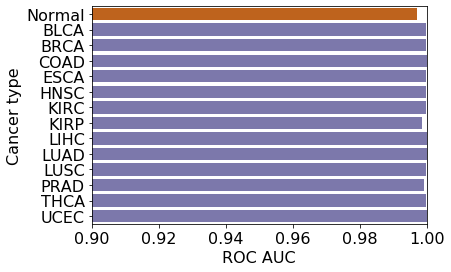

In [10]:
import importlib
import Evaluate
importlib.reload(Evaluate)

from Evaluate import get_roc_auc, get_pr_auc, plot_pr_and_roc_auc_bars
roc_aucs = get_roc_auc(cancer_type, metrics_path)

from Evaluate import get_pr_auc
aucs = get_pr_auc('', metrics_path, model_path, Xtest, ytest)
aucs

cancer_types = ['Normal', 'BLCA', 'BRCA', 'COAD', 'ESCA', 'HNSC', 'KIRC', 'KIRP', 'LIHC', 'LUAD', 'LUSC', 'PRAD', 'THCA', 'UCEC']

plot_pr_and_roc_auc_bars(cancer_types, aucs, None, roc_aucs, pr_save_path = figure_folder + 'PR_bar_plot_xgboost_multiclass.svg', roc_save_path = figure_folder + 'ROC_bar_plot_xgboost_multiclass.svg')